# MELTS geobarometry part 2 - plagioclase - 2-pyroxene saturated magmas

- The rhyoliteMELTS geobarometer first used by Gualda and Ghiorso (2014), which focused on the quartz - 2-feldspar ternary, has been expanded to consider the co-saturation of other phases. One of the primary applications of this method outside of high-silica rhyolites is the co-saturation of plagioclase and pyroxene(s) in felsic and intermediate magmas (Harmon et al. 2018).
- In this notebook we use an experimental composition from Moore and Carmichael (1998) to evaluate the performance of the plagioclase-pyroxene(s) barometry method.

**Before any calculations can be run** users need to install the alphaMELTS for Python source code. Please refer to the installation instructions on the petthermotools ReadtheDocs for how to do so. These files need to be added to the Python path. This can either be achieved through the installation step and/or in the code below using the `sys.path.append(r"path_to_alphaMELTS")` code

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import petthermotools as ptt
# sys.path.append(r'path_to_alphaMELTS')

ptt.__version__

'0.3.11'

In [3]:
# used to suppress MELTS outputs in MacOS systems (run twice)
import platform
if platform.system() == "Darwin":
    import sys
    import os
    sys.stdout = open(os.devnull, 'w')
    sys.stderr = open(os.devnull, 'w')

To demonstrate how PetThermoTools can be used to estimate the pressure of storage for any magma saturated in multiple solid phases we'll use the compsition of an orthopyroxene, clinopyroxene, and plagioclase saturated melt from experiment PEM12-19 of Moore and Carmichael (1998).

In [4]:
bulk = {'SiO2_Liq': 61.8,
       'TiO2_Liq': 0.61,
       'Al2O3_Liq': 16.5,
       'FeOt_Liq': 3.77,
       'MgO_Liq': 1.7,
       'CaO_Liq': 4.91,
       'Na2O_Liq': 3.5,
       'K2O_Liq': 1.87,
       'H2O_Liq': 3.6}

Before we run the barometry calculations there are several other things that need to be specified:
- The oxygen fugacity of the system, reported to be NNO +1.1.
- The pressure range and number of steps.
- The phases of interest.
- The thermodynamic model we want to use for the calculations.


In [5]:
fO2_offset = 1.1 # offset from NNO buffer
P_bar = np.linspace(250,7500,38) #bars
phases = ['clinopyroxene1', 'orthopyroxene1', 'plagioclase1']
Model = "MELTSv1.0.2" # calculations performed using the rhyolite-MELTS v1.0.2 thermodynamic model as in Harmon et al. (2018)

Now we can use these parameters to calculate pressure. Note, with a natural glass data the H$_2$O content and oxygen fugacity may not be known, which leads to additional uncertainty in the calculation as these parameters have a notable influence on the saturation curves investigated here.

Notably, in the example below we'll also specify a maximum temperaure interval on 200 degrees Celsius below the liquidus and a temperature step for each calculatio of 1 degree Celsius.

In [6]:
minimum_v102, xtal_v102 = ptt.mineral_cosaturation(bulk = bulk, 
                                   Model = Model,
                                   phases = phases,
                                   P_bar = P_bar, 
                                   T_initial_C = 1050,
                                   fO2_buffer = "NNO",
                                   fO2_offset = fO2_offset,
                                   dt_C = 1, # temperature interval for each calculation
                                   T_maxdrop_C = 200) # maximum temperature below the liquidus the code will search for 3 phase saturation
                                    

To investigate the results, we can use in-built plotting functions to look at the position of the saturation curves in P-T space:

(<Figure size 500x400 with 1 Axes>,
 <Axes: xlabel='P (bars)', ylabel='T ($\\degree$C)'>)

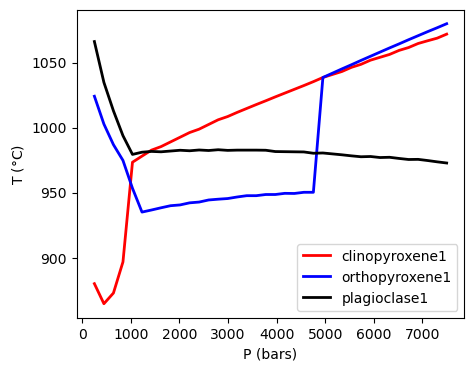

In [7]:
ptt.plot_surfaces(Results = minimum_v102, P_bar = P_bar, phases = phases)

We can also investigate the temperature residual between the curves using the plottin function below.

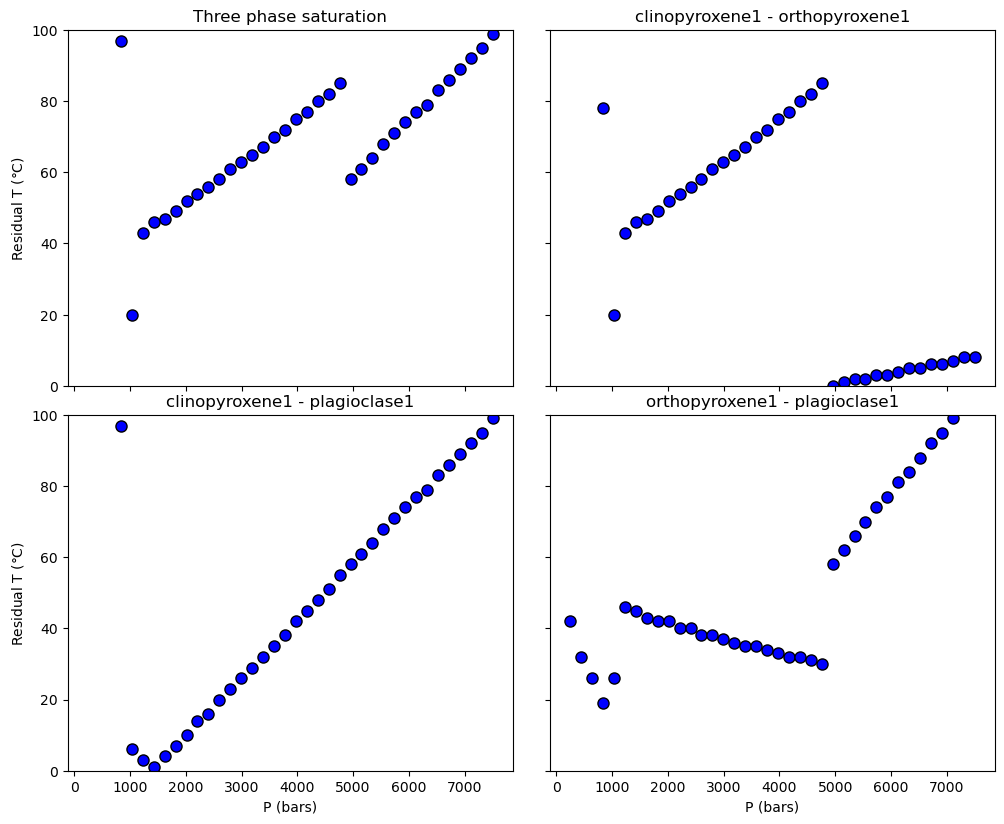

In [8]:
ptt.residualT_plot(Results = minimum_v102, P_bar = P_bar, phases = phases, interpolate = False, ylim = [0, 100])

These results suggest that the magma likely equilibrated around 900 - 1400 bars (90-100 MPa), with the plagioclase-clinopyroxene intersection indicating a slightly higher pressure of equilibrium than the 3-phase and plagioclase-orthopyroxene intersections. Interestingly, these results aline well with the experimental pressure of 1008 bars (100.8 MPa). However, if we were to follow the "Which MELTS verison should you use?" flow-diagram on the ofm-research website (https://melts.ofm-research.org/MELTS-decision-tree.html), you'll see that we should have used rhyolite-MELTS v1.2.0 as the magma contains dissolved H$_2$O. As a result, we can rerun the calculations, keeping everything the same but using the rhyolite-MELTS v1.2.0 model instead.

In [9]:
Model = "MELTSv1.2.0"
minimum_v120, xtal_v120 = ptt.mineral_cosaturation(bulk = bulk, 
                                   Model = Model,
                                   phases = phases,
                                   P_bar = P_bar, 
                                   T_initial_C = 1050,
                                   fO2_buffer = "NNO",
                                   fO2_offset = fO2_offset,
                                   dt_C = 1, # temperature interval for each calculation
                                   T_maxdrop_C = 200) # maximum temperature below the liquidus the code will search for 3 phase saturation
                                    

(<Figure size 500x400 with 1 Axes>,
 <Axes: xlabel='P (bars)', ylabel='T ($\\degree$C)'>)

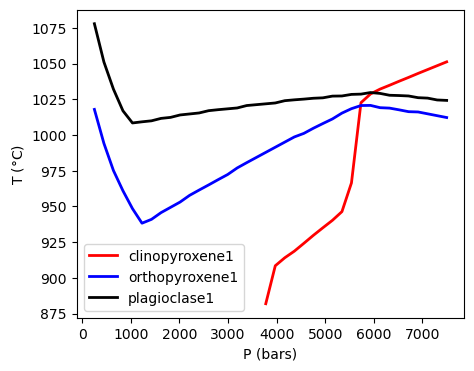

In [10]:
ptt.plot_surfaces(Results = minimum_v120, P_bar = P_bar, phases = phases)

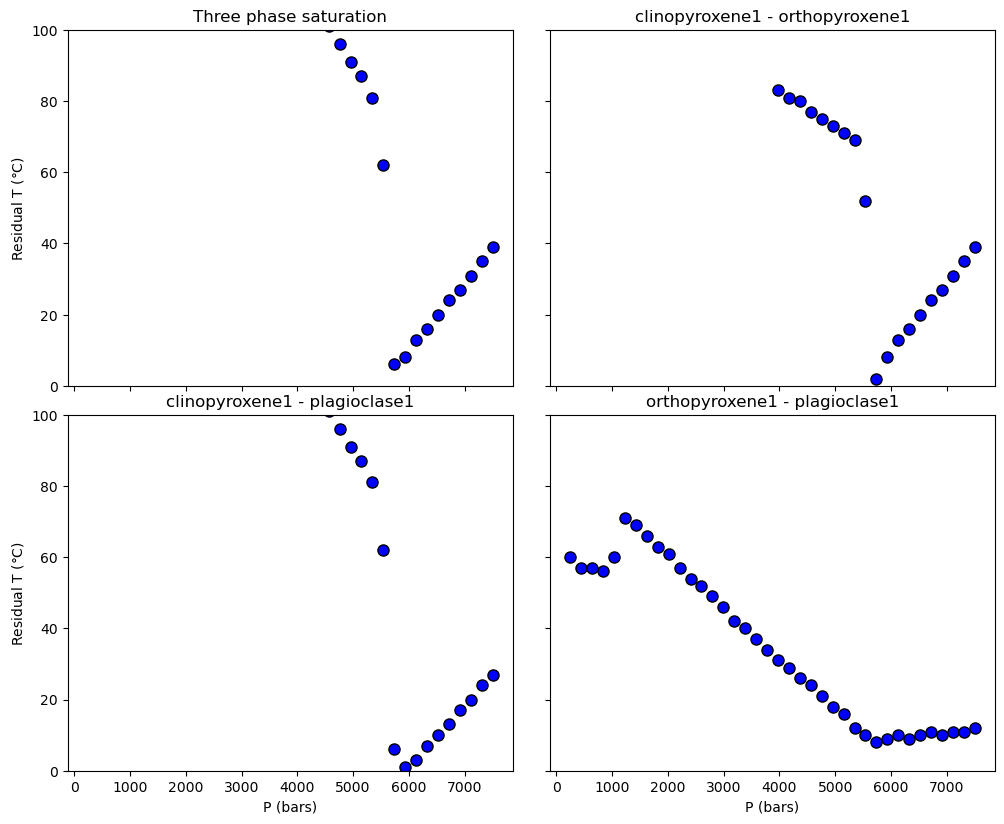

In [11]:
ptt.residualT_plot(Results = minimum_v120, P_bar = P_bar, phases = phases, interpolate = False, ylim = [0, 100])

The graphs above indicate that if we were to use the rhyolite-MELTS v1.2.0 model to determine the storage pressure of this magma we'd get a result between approximately 5500 and 6000 bars. Notably, this is around 5000 bars higher than the true experimental pressure and the result obtained using the rhyolite-MELTS v1.0.2 model. So, does this mean that these calculations should be performed using the rhyolite-MELTS v1.0.2 model only? Unfortunately things arn't quite that simple, as analysis of ~40 plagioclase - 2-pyroxene saturated melt compositions in Wieser et al. (2023) indicate that there is a very poor correlation between experimental pressure and the pressure determined by the the MELTS geobarometer for both MELTS models.

![alt text](P2P_review.jpg)